# Titanic Dataset classifcation

## Packages

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [34]:
train_df = pd.read_csv('data\\preprocessed_train.csv')
test_df = pd.read_csv('data\\preprocessed_test.csv')

In [35]:
x_train = train_df.drop(["Survived"], axis=1)
y_train = train_df["Survived"]

## Classifiers

In [36]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)) # by default uses a dicision tree with max_depth=1
xgb = XGBClassifier(eval_metric='logloss')

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. A solution to this problem is a procedure called cross-validation (CV for short). 

## Cross-validation

Cross-validation is a technique used in machine learning and statistical modeling to assess how well a model will generalize to an independent dataset. It involves partitioning the dataset into subsets, fitting the model on some of these subsets (training sets), and evaluating it on the remaining subsets (validation or test sets). The process is repeated multiple times, with different partitions of the data, to ensure robustness of the evaluation.

The most common type of cross-validation is k-fold cross-validation, where the dataset is divided into k equal-sized folds. The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold being used as the validation set exactly once. The performance metrics are then averaged over all k iterations to obtain an overall estimate of the model's performance.

<div style="background-color: lightblue; padding: 10px; width: 50%;">
    <img src='images\grid_search_cross_validation.png'>
</div>

Cross-validation helps to mitigate issues such as overfitting (where the model performs well on the training data but poorly on unseen data) and provides a more reliable estimate of the model's performance. It is widely used in model selection, hyperparameter tuning, and assessing the generalization ability of machine learning models.

### Grid Search CV
It does an exhaustive search over specified parameter values for an estimator, and applys k-fold cross-validation on each combination.

### Random Search CV
In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. 

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [38]:
# parameter for KNN
params_knn={'n_neighbors':np.arange(1,50)}
grid_knn=GridSearchCV(knn,param_grid=params_knn,cv=5)

#parameter for decision tree
para_dt={'criterion':['gini','entropy'],'max_depth':np.arange(1,50),
         'min_samples_leaf':[1,2,4,5,10,20,30,40,50,80,100]}
grid_dt=GridSearchCV(dt,param_grid=para_dt,cv=5)

#parameter for Random Forest
params_rf={'n_estimators':[100,200,350,500],
           'min_samples_leaf':[2,10,30,50,80,100]}
grid_rf=GridSearchCV(rf,param_grid=params_rf,cv=5)

#parameters for AdaBoost
params_ada={
    'algorithm': ['SAMME'],
    'n_estimators':[50,100,250,400,500],
    'learning_rate':[0.1,0.001,0.2,0.5,0.8,1]}
grid_ada=GridSearchCV(ada,param_grid=params_ada,cv=5)

# paraameter for XGBoost
params_xgb={'n_estimators':[50,100,250,600,800,1000],
           'learning_rate':[0.1,0.001,0.2,0.5,0.8,1]}
rs_xgb=RandomizedSearchCV(xgb,param_distributions=params_xgb,cv=5)

In [39]:
grid_knn.fit(x_train, y_train)
grid_dt.fit(x_train,y_train)
grid_rf.fit(x_train,y_train)
grid_ada.fit(x_train,y_train)
rs_xgb.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.001, 0.2, 0.5,
                                                          0.8, 1],
                                        'n_estimators': [50, 100, 250, 600, 800,
                                                         1000]})

In [40]:
print("Best parameters for K-Nearest Neighbors:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for K-Nearest Neighbors: {'n_neighbors': 21}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 100}
Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 400}
Best parameters for XGBoost: {'n_estimators': 50, 'learning_rate': 0.1}


In [41]:
dt = grid_dt.best_estimator_
rf = grid_rf.best_estimator_
ada = grid_ada.best_estimator_
xgb = rs_xgb.best_estimator_

In [42]:
classifiers = [('K-Nearest Neighbors', knn), ('Logistic Regression', lr), ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),('XGBoost', xgb),]

K-Nearest Neighbors classification report
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       165
           1       0.56      0.44      0.49       103

    accuracy                           0.65       268
   macro avg       0.63      0.61      0.61       268
weighted avg       0.64      0.65      0.64       268



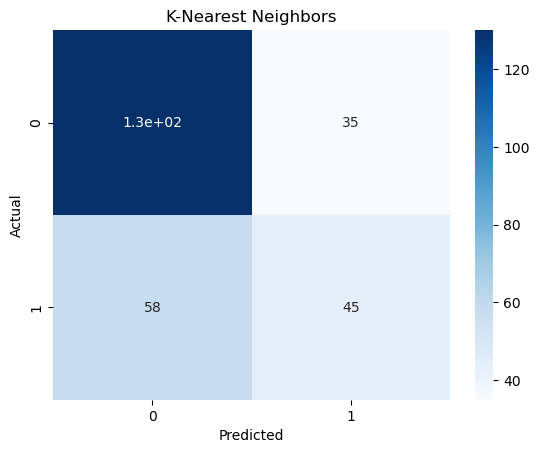

c:\Users\hai_c\MiniConda3\envs\bootcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression classification report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       165
           1       0.68      0.76      0.72       103

    accuracy                           0.77       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.77      0.77       268



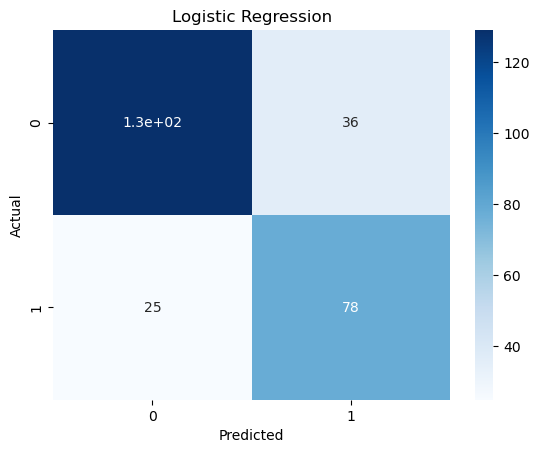

Decision Tree classification report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.74      0.67      0.70       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



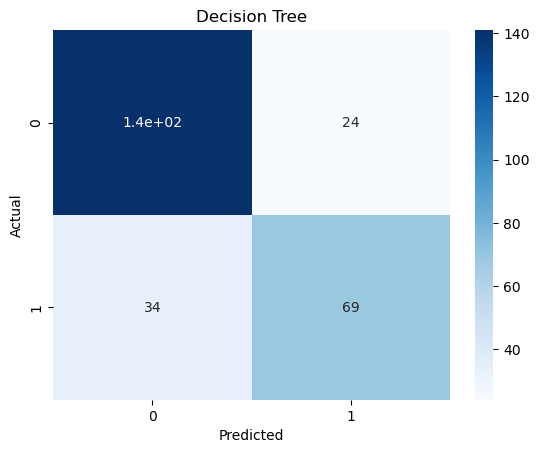

Random Forest classification report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       165
           1       0.77      0.67      0.72       103

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



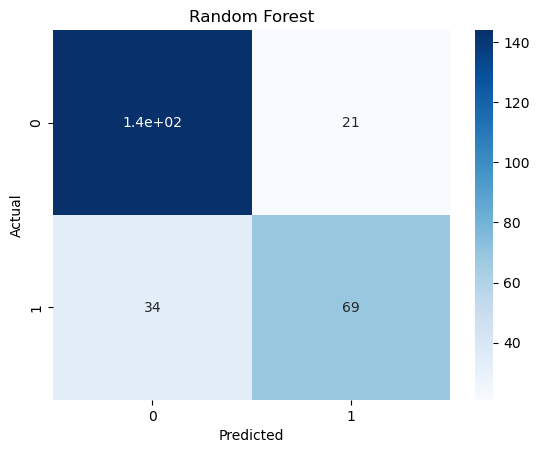

AdaBoost classification report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       165
           1       0.77      0.70      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



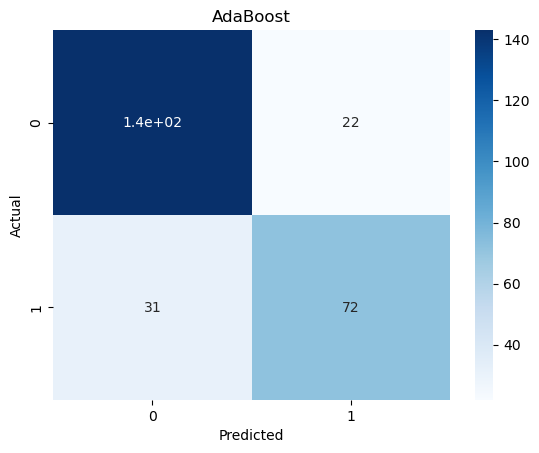

XGBoost classification report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.74      0.67      0.70       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



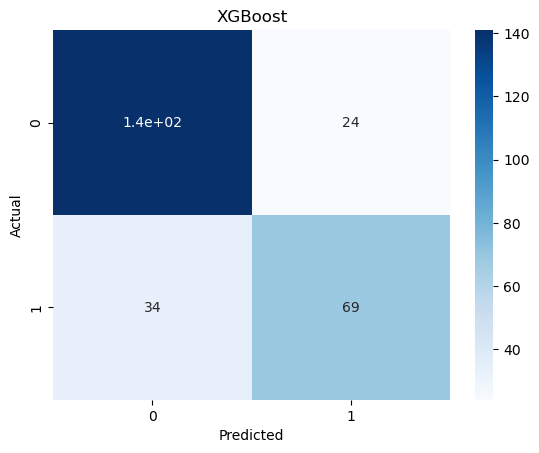

In [43]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

scores = {
    'accuracy_scores': {},
    'f1_scores': {}
}

for classifier_name, classifier in classifiers:
    # fit classifier
    classifier.fit(x_train, y_train)
    
    # predict labels for test set
    y_pred = classifier.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    scores['accuracy_scores'][classifier_name] = accuracy
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    scores['f1_scores'][classifier_name] = f1
        
    print(f'{classifier_name} classification report')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(classifier_name)
    plt.show()

In [44]:
# Create DataFrame
df = pd.DataFrame(scores)
df

,accuracy_scores,f1_scores
K-Nearest Neighbors,0.652985,0.491803
Logistic Regression,0.772388,0.718894
Decision Tree,0.783582,0.704082
Random Forest,0.794776,0.715026
AdaBoost,0.802239,0.730964
XGBoost,0.783582,0.704082


<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Now that we got out best classifier, we can use it to predict on passanger data. The dataset does not include data about all the passangers that were on-board the titanic, try to find the relvant information about one of the passanger not included in the dataset and predict if he survived or not then check the if result is correct or not.